In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli
from qiskit_aer.primitives import Estimator
import matplotlib.pyplot as plt

## Do the Hello world example on a 2-qubit Bell state

### Step 1: Map the problem to circuits and operators

We first make the state
$$\ket{\psi} = \frac{\ket{00}+\ket{11}}{\sqrt{2}}$$

### Step 2: Optimize
We need to optimize the circuit observables. This is for errors

### Step 3: Execute
Execute the circuit on the backend

### Step 4: Post-process
Analysis of the results and plotting

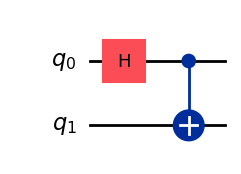

In [ ]:
# make the 2-qubit circuit for a Bell state
qc = QuantumCircuit(2)
# apply the Hadamard and the CNOT gates
qc.h(0)
qc.cx(control_qubit=0, target_qubit=1)
# draw the circuit
qc.draw(output='mpl')

In [6]:
# we create the 2-qubit operators to compute the expectation value
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

# setup the estimator
estimator = Estimator()
job = estimator.run([qc]*len(observables), observables)
# print the results
job.result()

EstimatorResult(values=array([ 1.       , -0.0546875, -0.0546875,  1.       ,  0.0078125,
        0.0078125]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0040308, 'sample_measure_time': 0.0010516, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 16071, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 12, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.99700927734375, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0040308, 'sample_measure_time': 0.0010516, 'in

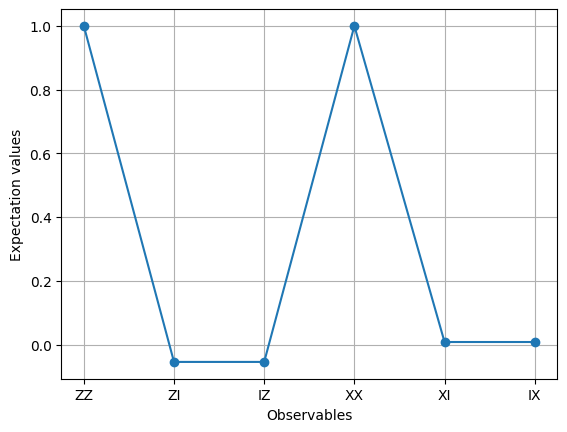

In [23]:
# plot the results
data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

fig, ax = plt.subplots()

ax.plot(data, values, '-o')
ax.set_xlabel('Observables')
ax.set_ylabel('Expectation values')
ax.grid()
#ax.legend()